In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA


In [2]:
# 시계열 데이터 생성 
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임워크 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

# 결측치 생성 
data.loc[50:150, 'Value'] = np.nan
print(data.loc[50:150])

          Date  Value
50  2023-02-20    NaN
51  2023-02-21    NaN
52  2023-02-22    NaN
53  2023-02-23    NaN
54  2023-02-24    NaN
..         ...    ...
146 2023-05-27    NaN
147 2023-05-28    NaN
148 2023-05-29    NaN
149 2023-05-30    NaN
150 2023-05-31    NaN

[101 rows x 2 columns]


### ARIMA 모델 활용하여 결측치 예측과 대처 실습

In [3]:
model = ARIMA(data['Value'].dropna(), order=(1,1,1))
# 결측치를 제거한 데이터를 사용하여 ARIMA 모델을 생성합니다. 여기서는 모델의 순서를 (1,1,1)로 설정합니다.
model_fit = model.fit()

# 결측치 예측 
predicted_values = model_fit.predict(start=50, end=2000) # 초과하는 범위 내 predict 시행
print(predicted_values)

# 결측치 대처 
data.loc[50:150, 'value temp'] = predicted_values
print(data[50:150])

50     -0.100298
51     -0.022726
52     -0.068369
53     -0.088900
54     -0.076192
          ...   
1996    0.049800
1997    0.049800
1998    0.049800
1999    0.049800
2000    0.049800
Name: predicted_mean, Length: 1951, dtype: float64
          Date  Value  value temp
50  2023-02-20    NaN   -0.100298
51  2023-02-21    NaN   -0.022726
52  2023-02-22    NaN   -0.068369
53  2023-02-23    NaN   -0.088900
54  2023-02-24    NaN   -0.076192
..         ...    ...         ...
145 2023-05-26    NaN    0.003538
146 2023-05-27    NaN    0.036921
147 2023-05-28    NaN   -0.021787
148 2023-05-29    NaN   -0.007316
149 2023-05-30    NaN   -0.007915

[100 rows x 3 columns]


/opt/homebrew/Caskroom/miniforge/base/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/m

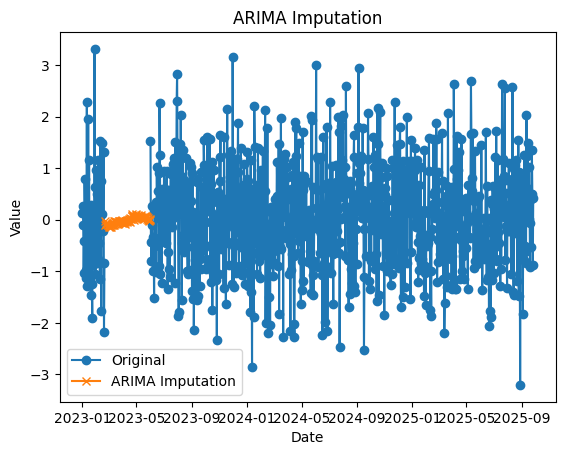

In [4]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['value temp'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.legend()
plt.show()